In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('card_transdata.csv')

In [3]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [5]:
df.shape

(1000000, 8)

In [6]:
df=df.dropna()

In [7]:
df.shape

(1000000, 8)

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='fraud', ylabel='distance_from_home'>

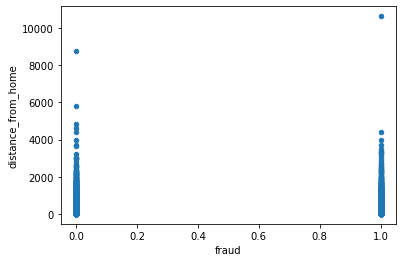

In [9]:
df.plot(x='fraud',y='distance_from_home',kind='scatter')

In [10]:
df=df[df['distance_from_home']<5000]

<AxesSubplot:xlabel='fraud', ylabel='distance_from_last_transaction'>

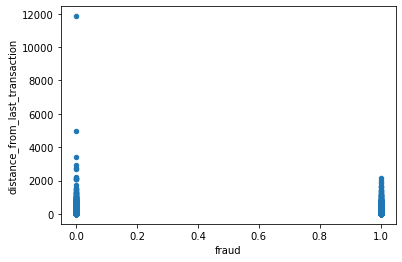

In [11]:
df.plot(x='fraud',y='distance_from_last_transaction',kind='scatter')

In [12]:
df=df[df['distance_from_last_transaction']<4000]

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

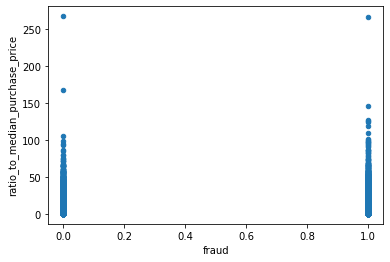

In [13]:
df.plot(x='fraud',y='ratio_to_median_purchase_price',kind='scatter')

In [14]:
df=df[df['ratio_to_median_purchase_price']<150]

<AxesSubplot:xlabel='fraud', ylabel='distance_from_home'>

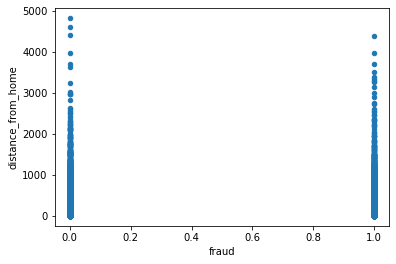

In [15]:
df.plot(x='fraud',y='distance_from_home',kind='scatter')

<AxesSubplot:xlabel='fraud', ylabel='distance_from_last_transaction'>

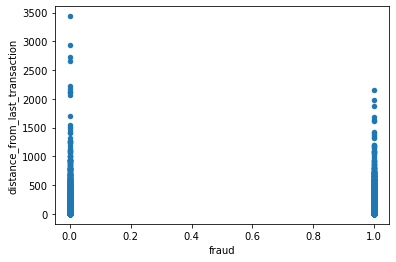

In [16]:
df.plot(x='fraud',y='distance_from_last_transaction',kind='scatter')

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

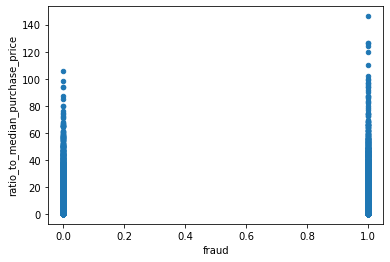

In [17]:
df.plot(x='fraud',y='ratio_to_median_purchase_price',kind='scatter')

In [18]:
df.shape

(999992, 8)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop('fraud',axis=1)
y=df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [21]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
import catboost as cb
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [23]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [24]:
grid = {'learning_rate': [0.03],
'depth': [4],
'l2_leaf_reg': [1],
'iterations': [50]}
model.grid_search(grid,train_dataset)

0:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 468ms	remaining: 22.9s
1:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 542ms	remaining: 13s
2:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 602ms	remaining: 9.43s
3:	learn: 0.9896530	test: 0.9899937	best: 0.9899937 (3)	total: 661ms	remaining: 7.6s
4:	learn: 0.9896530	test: 0.9899999	best: 0.9899999 (4)	total: 719ms	remaining: 6.47s
5:	learn: 0.9896874	test: 0.9900374	best: 0.9900374 (5)	total: 775ms	remaining: 5.68s
6:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 836ms	remaining: 5.13s
7:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 890ms	remaining: 4.67s
8:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 943ms	remaining: 4.3s
9:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 1s	remaining: 4s
10:	learn: 0.9896983	test: 0.9900749	best: 0.9900749 (10)	total: 1.05s	remaining: 3.72s
11:	learn: 0.9897077	test: 0.9900812	best: 0.9900812 (11)	tota

46:	learn: 0.9955918	test: 0.9954175	best: 0.9954175 (45)	total: 3.18s	remaining: 203ms
47:	learn: 0.9955768	test: 0.9954025	best: 0.9954175 (45)	total: 3.25s	remaining: 135ms
48:	learn: 0.9955768	test: 0.9954025	best: 0.9954175 (45)	total: 3.32s	remaining: 67.7ms
49:	learn: 0.9955825	test: 0.9954025	best: 0.9954175 (45)	total: 3.38s	remaining: 0us

bestTest = 0.9954174714
bestIteration = 45

Training on fold [1/3]
0:	learn: 0.9802392	test: 0.9804548	best: 0.9804548 (0)	total: 70ms	remaining: 3.43s
1:	learn: 0.9820017	test: 0.9821836	best: 0.9821836 (1)	total: 140ms	remaining: 3.36s
2:	learn: 0.9910337	test: 0.9910637	best: 0.9910637 (2)	total: 200ms	remaining: 3.13s
3:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total: 264ms	remaining: 3.04s
4:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total: 326ms	remaining: 2.93s
5:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total: 381ms	remaining: 2.79s
6:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total: 436

41:	learn: 0.9947893	test: 0.9949487	best: 0.9949487 (39)	total: 2.92s	remaining: 556ms
42:	learn: 0.9947893	test: 0.9949487	best: 0.9949487 (39)	total: 2.98s	remaining: 486ms
43:	learn: 0.9948587	test: 0.9949824	best: 0.9949824 (43)	total: 3.04s	remaining: 415ms
44:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 3.1s	remaining: 345ms
45:	learn: 0.9948587	test: 0.9949824	best: 0.9949824 (43)	total: 3.17s	remaining: 275ms
46:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 3.24s	remaining: 207ms
47:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 3.3s	remaining: 138ms
48:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 3.37s	remaining: 68.7ms
49:	learn: 0.9949450	test: 0.9951062	best: 0.9951062 (49)	total: 3.43s	remaining: 0us

bestTest = 0.9951062011
bestIteration = 49



{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 50,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

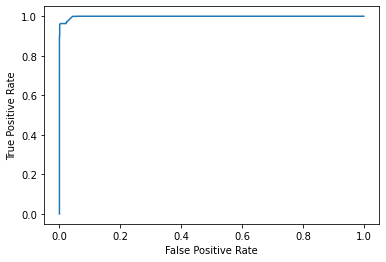

In [25]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

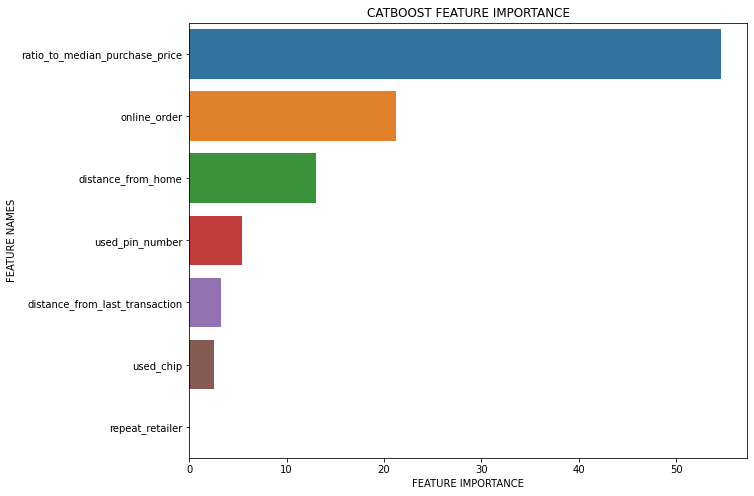

In [28]:
import numpy as np
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')